# Passo 1: Coleta de Dados

## Escolha da Empresa
Para este projeto, escolhemos a empresa **Telefônica Brasil (VIVT3.SA)** para prever o valor de fechamento das suas ações.

## Fonte de Dados
Utilizaremos a biblioteca `yfinance` para coletar os dados históricos das ações da Vivo. A `yfinance` é uma biblioteca Python que permite acessar dados financeiros do Yahoo Finance.

## Período de Dados
Definimos o período de tempo para os dados históricos como os últimos 5 anos, de 1º de janeiro de 2020 a 31º de Dezembro de 2024.


In [11]:
import yfinance
import pandas as pd


symbol = 'VIVT3.SA'
data = yfinance.download(symbol, start='2020-01-01', end='2024-12-31')
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,VIVT3.SA,VIVT3.SA,VIVT3.SA,VIVT3.SA,VIVT3.SA
Date,,,,,
2020-01-02,35.208370,35.485714,34.894531,35.456522,38100
2020-01-03,35.617088,35.755763,34.580691,35.135382,49900
2020-01-06,35.274059,35.733868,35.149982,35.500314,43700
2020-01-07,36.055016,36.055016,35.135392,35.237572,46400
2020-01-08,36.419945,36.434539,35.770368,36.055015,47800


In [12]:
data.shape

(1244, 5)

In [13]:
data.columns

MultiIndex([( 'Close', 'VIVT3.SA'),
            (  'High', 'VIVT3.SA'),
            (   'Low', 'VIVT3.SA'),
            (  'Open', 'VIVT3.SA'),
            ('Volume', 'VIVT3.SA')],
           names=['Price', 'Ticker'])

# Passo 2: Pré-processamento de Dados


In [14]:
#Tratamento de Valores Ausentes
data.isnull().sum()

Price   Ticker  
Close   VIVT3.SA    0
High    VIVT3.SA    0
Low     VIVT3.SA    0
Open    VIVT3.SA    0
Volume  VIVT3.SA    0
dtype: int64

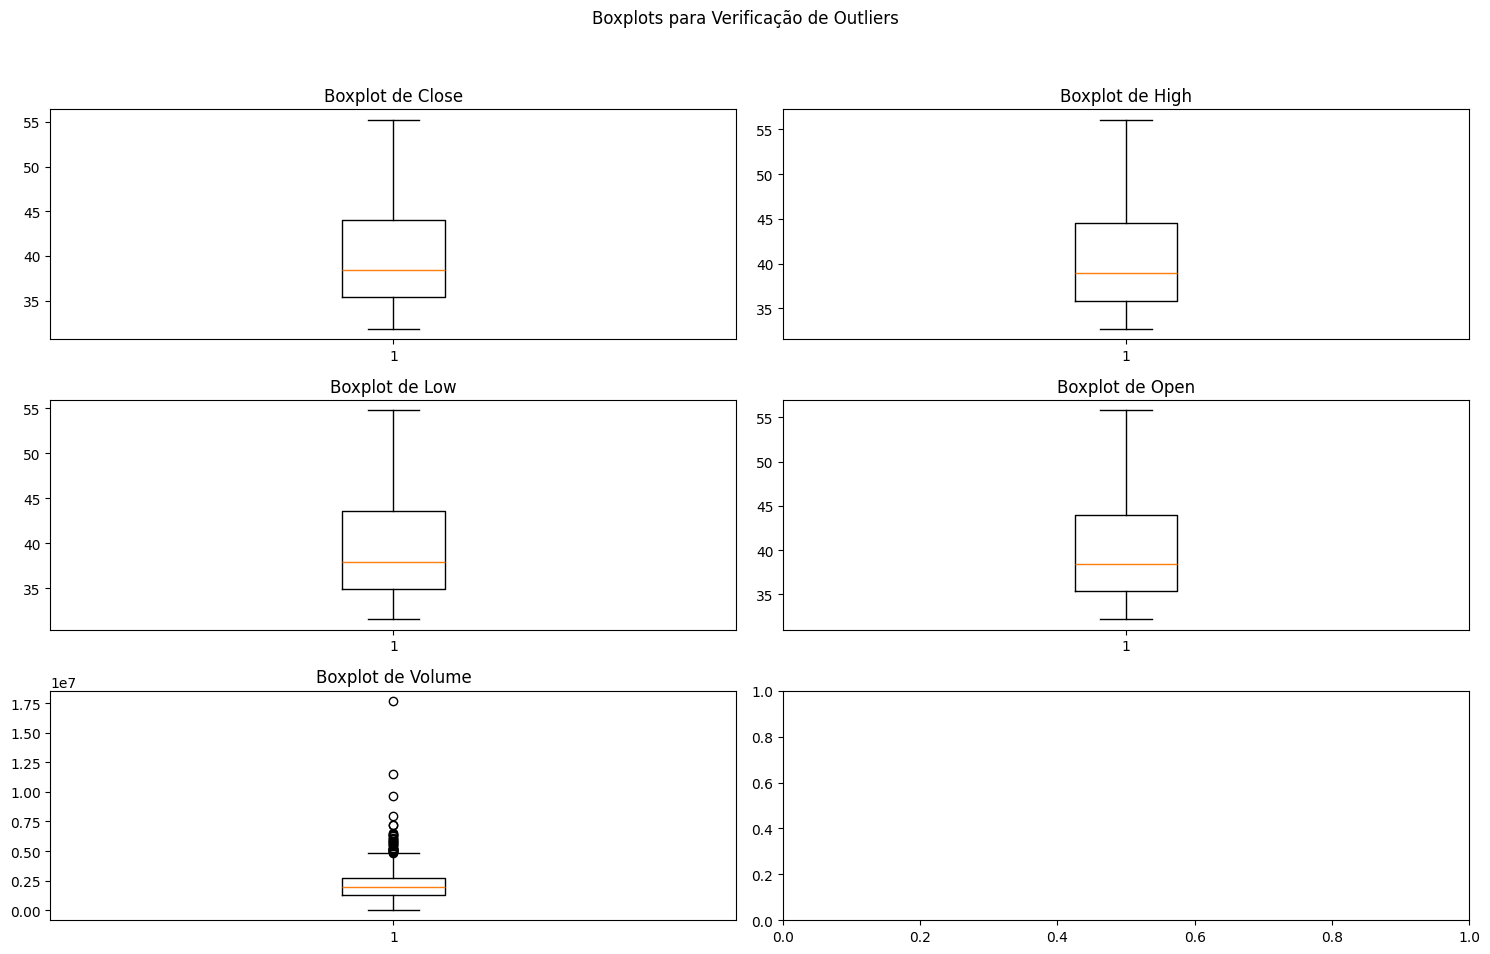

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
fig.suptitle('Boxplots para Verificação de Outliers')

#columns = [('Adj Close', 'VIVT3.SA'),
columns = [('Close', 'VIVT3.SA'), ('High', 'VIVT3.SA'),
           ('Low', 'VIVT3.SA'), ('Open', 'VIVT3.SA'), ('Volume', 'VIVT3.SA')]

for ax, col in zip(axes.flatten(), columns):
    ax.boxplot(data[col])
    ax.set_title(f'Boxplot de {col[0]}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [16]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,VIVT3.SA,VIVT3.SA,VIVT3.SA,VIVT3.SA,VIVT3.SA
count,1244.000000,1244.000000,1244.000000,1244.000000,1.244000e+03
mean,40.158646,40.630941,39.701765,40.158609,2.024460e+06
std,5.771502,5.795057,5.756529,5.754472,1.394775e+06
min,31.877607,32.758306,31.584829,32.209675,3.370000e+04
25%,35.391286,35.807524,34.960511,35.381586,1.322700e+06
50%,38.404091,38.947871,37.933020,38.439111,1.985950e+06
75%,44.049854,44.546480,43.597025,43.968727,2.732900e+06
max,55.237522,56.054907,54.764819,55.789012,1.766530e+07


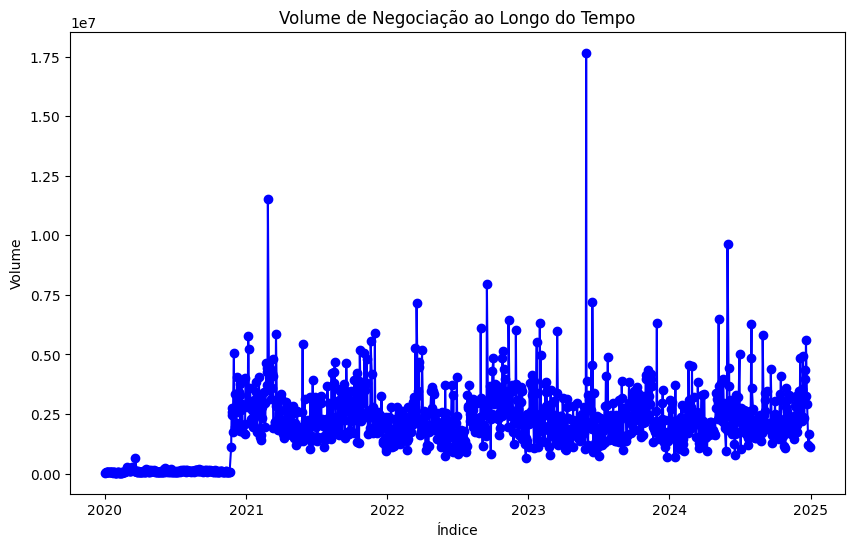

In [17]:
#Verificando col Volume
df = pd.DataFrame(data)

# Visualizar a coluna Volume
plt.figure(figsize=(10, 6))
plt.plot(df.index, df[('Volume', 'VIVT3.SA')], marker='o', linestyle='-', color='b')
plt.title('Volume de Negociação ao Longo do Tempo')
plt.xlabel('Índice')
plt.ylabel('Volume')
plt.show()

In [18]:
#Normalização e Padronização
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)
data_normalized = pd.DataFrame(data_normalized, columns=data.columns)

data_normalized.describe()

Price,Close,High,Low,Open,Volume
Ticker,VIVT3.SA,VIVT3.SA,VIVT3.SA,VIVT3.SA,VIVT3.SA
count,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000
mean,0.354498,0.337931,0.350170,0.337114,0.112909
std,0.247069,0.248751,0.248340,0.244047,0.079107
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150415,0.130887,0.145629,0.134521,0.073107
50%,0.279388,0.265685,0.273865,0.264190,0.110724
75%,0.521074,0.506004,0.518214,0.498702,0.153089
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
#Verificação para codificar dados categóricos
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1244 entries, 2020-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, VIVT3.SA)   1244 non-null   float64
 1   (High, VIVT3.SA)    1244 non-null   float64
 2   (Low, VIVT3.SA)     1244 non-null   float64
 3   (Open, VIVT3.SA)    1244 non-null   float64
 4   (Volume, VIVT3.SA)  1244 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.3 KB


In [20]:
#Verificando se é necessário tratamento de inconsistências
data.head()

Price,Close,High,Low,Open,Volume
Ticker,VIVT3.SA,VIVT3.SA,VIVT3.SA,VIVT3.SA,VIVT3.SA
Date,,,,,
2020-01-02,35.208370,35.485714,34.894531,35.456522,38100
2020-01-03,35.617088,35.755763,34.580691,35.135382,49900
2020-01-06,35.274059,35.733868,35.149982,35.500314,43700
2020-01-07,36.055016,36.055016,35.135392,35.237572,46400
2020-01-08,36.419945,36.434539,35.770368,36.055015,47800


# Desenvolvimento do Modelo LSTM


In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np

2025-01-24 18:42:52.188089: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-24 18:42:52.195158: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-24 18:42:52.257540: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-24 18:42:52.299869: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737754972.343682   14316 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737754972.35

In [22]:
#Criação de sequências de Dados
def create_sequences(data, seq_length):
    xs = []
    ys = []

    for i in range(len(data) - seq_length - 1):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)

#Definindo o tamanho da sequência
seq_length = 60
data = data_normalized.values

#Criando as sequências
X, y = create_sequences(data, seq_length)
X.shape, y.shape

((1183, 60, 5), (1183, 5))

In [23]:
#Divisão dos Dados em Treino e Teste
train_size = int(0.7 * len(data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
X_train.shape, X_test.shape

((870, 60, 5), (313, 60, 5))

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam



# Arquitetura do modelo LSTM
model = Sequential()
model.add(LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(units=200, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=200, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=1))

# Compilar o modelo
#model.compile(optimizer='adam', loss='mean_squared_error')
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

model.summary()

2025-01-24 18:42:53.731803: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/ayres/Documents/pos-tech-fiap-tech-challenge-4/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 200)        │       164,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 200)        │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 200)            │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 846,801 (3.23 MB)

 Trainable params: 846,801 (3.23 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
#Treinamento do Modelo
history = model.fit(X_train, y_train, epochs=300, batch_size=128, validation_split=0.2, verbose=1)
history.history.keys()

Epoch 1/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 307ms/step - loss: 0.0384 - val_loss: 0.0059
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - loss: 0.0092 - val_loss: 0.0060
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step - loss: 0.0087 - val_loss: 0.0060
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - loss: 0.0083 - val_loss: 0.0063
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - loss: 0.0083 - val_loss: 0.0056
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 254ms/step - loss: 0.0079 - val_loss: 0.0056
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 259ms/step - loss: 0.0083 - val_loss: 0.0055
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 254ms/step - loss: 0.0077 - val_loss: 0.0060
Epoch 9/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 256ms/step - loss: 0.0080 - val_loss: 0.0061
Epoch 10/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - loss: 0.0085 - val_loss: 0.0056
Epoch 11/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 271ms/step - loss: 0.0081 - val_loss: 0.0054
Epoch 12/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 257ms/step - loss: 0.0

dict_keys(['loss', 'val_loss'])

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

# Verificar as formas de y_test e y_pred
print(f'Forma de y_test: {y_test.shape}')
print(f'Forma de y_pred: {y_pred.shape}')

# Selecionar a coluna correta de y_test (por exemplo, a primeira coluna)
y_test_selected = y_test[:, 0]

# Ajustar a forma de y_pred se necessário
if y_pred.shape[1] == 1:
    y_pred = y_pred.reshape(-1)

# Verificar novamente as formas de y_test_selected e y_pred
print(f'Nova forma de y_test_selected: {y_test_selected.shape}')
print(f'Nova forma de y_pred: {y_pred.shape}')

# Desnormalizar y_test_selected e y_pred
y_test_selected = y_test_selected.reshape(-1, 1)
y_pred = y_pred.reshape(-1, 1)

# Desnormalizar usando o scaler
y_test_desnormalized = scaler.inverse_transform(np.concatenate([y_test_selected, np.zeros((y_test_selected.shape[0], data_normalized.shape[1] - 1))], axis=1))[:, 0]
y_pred_desnormalized = scaler.inverse_transform(np.concatenate([y_pred, np.zeros((y_pred.shape[0], data_normalized.shape[1] - 1))], axis=1))[:, 0]

# Calcular métricas de avaliação desnormalizadas
mae_desnormalized = mean_absolute_error(y_test_desnormalized, y_pred_desnormalized)
rmse_desnormalized = np.sqrt(mean_squared_error(y_test_desnormalized, y_pred_desnormalized))
mape_desnormalized = mean_absolute_percentage_error(y_test_desnormalized, y_pred_desnormalized)

print(f'MAE desnormalizado: {mae_desnormalized}')
print(f'RMSE desnormalizado: {rmse_desnormalized}')
print(f'MAPE desnormalizado: {mape_desnormalized}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step
Forma de y_test: (313, 5)
Forma de y_pred: (313, 1)
Nova forma de y_test_selected: (313,)
Nova forma de y_pred: (313,)
MAE desnormalizado: 2.8292053311735694
RMSE desnormalizado: 3.018872228851265
MAPE desnormalizado: 0.05732230093002919


In [27]:
print(f'Forma de y_test: {y_test.shape}')
print(f'Forma de y_pred: {y_pred.shape}')

Forma de y_test: (313, 5)
Forma de y_pred: (313, 1)


In [28]:
import pickle as pkl

#salva modelo em disco para deploy e teste
with open("modelo.pkl", "wb") as file:
    pkl.dump(model, file)

In [29]:
#carrega modelo pra teste se esta funcionando
with open("modelo.pkl", "rb") as file:
    model = pkl.load(file)

In [30]:
#salvar scaler para retreino com novos dados e teste
with open("scaler.pkl", "wb") as file:
    pkl.dump(scaler, file)

In [31]:
#carrega padronizador pra teste se esta funcionando
with open("scaler.pkl", "rb") as file:
    scaler = pkl.load(file)

FileNotFoundError: [Errno 2] No such file or directory: 'modelo_scaler.pkl'